# Math 425 Computation Linear Algebra
## Final Project, Problem 3.
##### *Topics in Matrix Transformation, Least-squares, Linear Modelling and Singular Vaule Decomposition.

### Group 3

+ Anneke Moeller; discussion and research
+ Shem Cheng; planning and discussion
+ Rai’d Muhammad; planning
+ Brent Thorne; software and reporting

### Problem 3. Classification of Handwritten Digits

##### The goal is to indentify handwitten Digits

In [1]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy import Eq # pretty equations
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing

### Manifest of data files of handwritten digits:
- handwriting training set.txt: 4000 training examples of handwritten digits. Each
training example is a 20 pixel by 20 pixel grayscale image of a digit reshaped into
a 400-dimensional vector. Each pixel is represented by a floating point number that
indicates the grayscale intensity at that location. Thus the set is a 4000 by 400 matrix.
- handwriting training set labels.txt: This data set contains the labels of the corresponding digits in the training set. The digits “1” to “9” are labeled as they are.
However, because MATLAB has no zero index, the digit zero is represented as the
value ten, i.e. “0” is labeled as “10.”
- handwriting test set.txt: 1000 test set of handwritten digits with the same format
as the training set. Thus this set is a 1000 by 400 matrix.
- handwriting test set labels.txt: The labels for the test set.

In [2]:
path = 'data'
fileInfo = [('handwriting_test_set.txt', 'handwriting_test_set_labels.txt', (4000,20,20)),\
         ('handwriting_training_set.txt', 'handwriting_training_set_labels.txt', (1000,20,20))]

In [3]:
import csv
fdataset, flabels, shape = fileInfo[1] # training set

fname = path+'/'+fdataset
mylist = []
with open(fname) as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
            mylist.append(row)
data = np.array(mylist)
data = data.astype(float)
#data = np.matrix(data) # is this needed? nope.

fname = path+'/'+flabels
mylist = []
with open(fname) as f:
    reader = csv.reader(f, delimiter='\n')
    for row in reader:
            mylist.append(row)
labels = np.array(mylist)  
labels = labels.astype(int)
labels = np.where(labels == 10, 0, labels) # fix up zero label
assert len(labels) == len(data) # valid training data is labeled

# generate ordered list of data indices
labelIndex = [] 
for i in range(10):
    labelIndex.append(np.where(labels==i)[0]) # only use index element

# below is the result of the file ingest...
# an ordered(0-9) list of lists of sample indices and the sample data as an array of 20x20 arrays 
# for example: data[labelIndex[4][0]], is the 0th, '4' training sample
len(labelIndex), len(data), len(labels) 

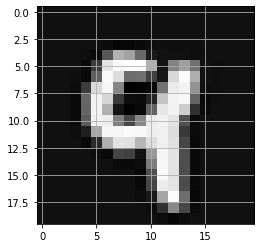

In [10]:
r = data[labelIndex[9][110]] # the 0th, '4' training sample

r.shape = (20,20) # our data is an array, reshape it into a 20x20 matrix 
R = r.T # transpose for humans
plt.imshow(R, cmap=plt.get_cmap('gray')) # show the humans
plt.grid(); plt.gca().set_aspect("equal") 

data.shape, r.shape, len(labelIndex) # "The Shape of Things to Come" -Book by H. G. Wells

In [5]:
# "What's in a name? that which we call a rose By any other name would smell as sweet.”
# - William Shakespeare, Romeo and Juliet 

# see also: https://www.quantstart.com/articles/QR-Decomposition-with-Python-and-NumPy/

A = data
b = labels

Q, R = np.linalg.qr(A)

#Rinv = np.linalg.inv(R) # Signular
#x_hat = np.linalg.inv(R)*np.transpose(A)*b # nope

#(A,b), (Q,R), (Q.T*b)

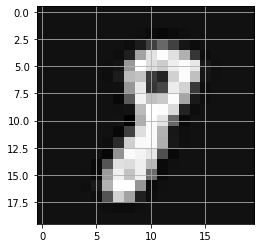

In [6]:
from matplotlib.animation import FuncAnimation, PillowWriter
from os.path import exists
filename = "handwritting.gif"
#if exists(path_to_file): break # only create this file once, its very time consuming
    
fig, ax = plt.subplots()

def init():
    plt.grid()
    plt.gca().set_aspect("equal") 

def update(i):
    n = 8
    r = data[n*20*20+i]
    r.shape = (20,20)
    rr = r.T # rotate for humans
    plt.imshow(rr, cmap=plt.get_cmap('gray'))
    
ani = FuncAnimation(fig, update, range(10), init_func=init)  
writer = PillowWriter(fps=25)  
ani.save(filename, writer=writer)
plt.show()

### Animate Sample.
##### Show some of the data
<img src="handwritting.gif" width="750" align="center">